元ネタ　　

http://colah.github.io/posts/2014-03-NN-Manifolds-Topology/

In [2]:
import os, codecs, sys
from glob import glob
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager
from matplotlib.colors import LinearSegmentedColormap
from datetime import datetime as dt
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

% matplotlib inline

def getdirs(path):
    dirs=[]
    for item in os.listdir(path):
        if os.path.isdir(os.path.join(path,item)):
            dirs.append(item)
    return dirs

def cnt_na(df):
    return df.apply(lambda x: 1 if x!=x else 0).sum()

In [3]:
import ipywidgets
from ipywidgets import interact

In [4]:
# settings ----------------------------

img_out = True
out_path = "./img/"
if not os.path.exists(out_path):
    os.makedirs(out_path)


In [5]:
# うずまきデータのモト
theta = np.linspace(0.3, 1.5*np.pi, 201)

In [6]:
# グループ1のデータ
y1 = theta*np.sin(theta)/4
y1 = y1 - y1[0]
y1 = y1[(y1 > -1)]
x1 = theta*np.cos(theta)/4
x1 = x1[:len(y1)]
data1 = pd.DataFrame(np.column_stack([x1, y1, [0]*len(x1)]), columns=["x1","x2", "y"])
data1.y = data1.y.astype(np.int)

In [7]:
# グループ2のデータ
y2 = theta*np.sin(theta+np.pi)/4
y2 = y2 - y2[0]
y2 = y2[(y2 < 1)]
x2 = theta*np.cos(theta+np.pi)/4
x2 = x2[:len(y2)]
data2 = pd.DataFrame(np.column_stack([x2, y2, [1]*len(x2)]), columns=["x1","x2", "y"])
data2.y = data2.y.astype(np.int)

In [8]:
# Gridの作成
axis_h = []
for v in np.linspace(-1,1,11):
    tmp_list = []
    for h in np.linspace(-1,1,51):
        tmp_list.append([v, h])
    axis_h.append(tmp_list)
axis_h = np.array(axis_h)

axis_v = []
for h in np.linspace(-1,1,11):
    tmp_list = []
    for v in np.linspace(-1,1,51):
        tmp_list.append([v, h])
    axis_v.append(tmp_list)
axis_v = np.array(axis_v)


In [9]:
def ReLu(x):
    return np.fmax(0, x)

ReLu = np.vectorize(ReLu)
def sigmoid(x):
    return 1/(1+np.exp(-x)) 

sigmoid
tanh
ReLu


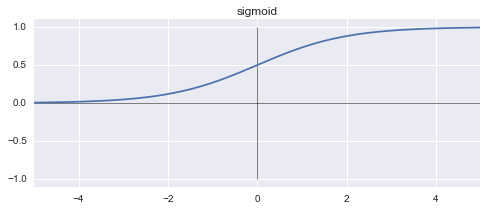

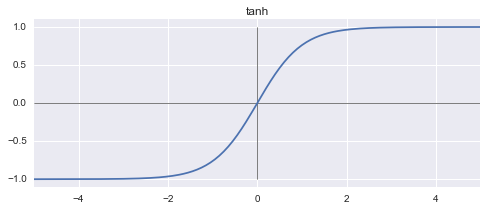

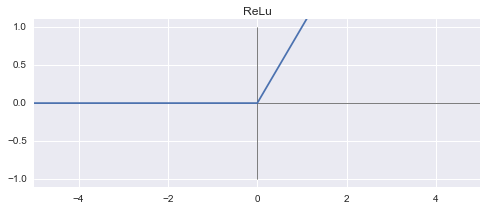

In [10]:
# tanhの可視化
for act_type in ['sigmoid', 'tanh', 'ReLu']:
    print(act_type)
    if act_type=="sigmoid":
        activation = sigmoid
    elif act_type=="tanh":
        activation = np.tanh
    else:
        activation = ReLu    
    xx = np.linspace(-5, 5, 201)
    plt.figure(figsize=(8,3))
    plt.xlim(-5, 5)
    plt.ylim(-1.1, 1.1)
    plt.plot([-5,5], [0,0], "k", lw=0.5)
    plt.plot([0,0], [-1,1], "k", lw=0.5)
    plt.plot(xx, activation(xx))
    plt.title(act_type)

tanh


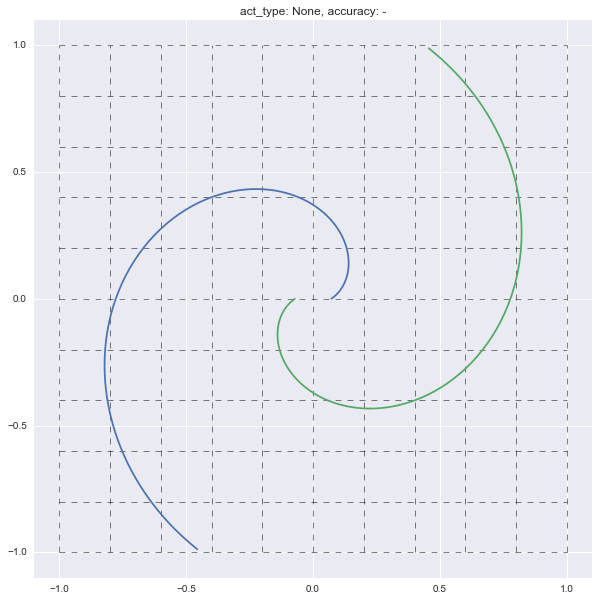

In [15]:
i = 1
@interact(w11_1=ipywidgets.FloatSlider(min=-4,max=4,step=0.1,value=1),
          w12_1=ipywidgets.FloatSlider(min=-4,max=4,step=0.1,value=0), 
          w21_1=ipywidgets.FloatSlider(min=-4,max=4,step=0.1,value=0),
          w22_1=ipywidgets.FloatSlider(min=-4,max=4,step=0.1,value=1),
          b1_1=ipywidgets.FloatSlider(min=-4,max=4,step=0.1,value=0),
          b1_2=ipywidgets.FloatSlider(min=-4,max=4,step=0.1,value=0),
          w11_2=ipywidgets.FloatSlider(min=-4,max=4,step=0.1,value=1),
          w12_2=ipywidgets.FloatSlider(min=-4,max=4,step=0.1,value=0), 
          w21_2=ipywidgets.FloatSlider(min=-4,max=4,step=0.1,value=0),
          w22_2=ipywidgets.FloatSlider(min=-4,max=4,step=0.1,value=1),
          b2_1=ipywidgets.FloatSlider(min=-4,max=4,step=0.1,value=0),
          b2_2=ipywidgets.FloatSlider(min=-4,max=4,step=0.1,value=0),
          activate=False,
          clf=False,
          act_type=ipywidgets.Dropdown(
                options=['sigmoid', 'tanh', 'ReLu'],
                value='tanh',
                description='Activation function type:',
                disabled=False,
                button_style='' # 'success', 'info', 'warning', 'danger' or ''
            ))
def vortex_plot(w11_1, w12_1, w21_1, w22_1, b1_1, b1_2,
                w11_2, w12_2, w21_2, w22_2, b2_1, b2_2,
                activate, clf, act_type):
    global i, X1, X2
    print(act_type)
    if act_type=="sigmoid":
        activation = sigmoid
    elif act_type=="tanh":
        activation = np.tanh
    else:
        activation = ReLu
    
    n_data1 = len(x1)
    n_data2 = len(x2)
    
    plt.figure(figsize=(10,10))
    
    W1  = [[b1_1, b1_2],
           [w11_1, w12_1],
           [w21_1, w22_1]]

    W2  = [[b2_1, b2_2],
           [w11_2, w12_2],
           [w21_2, w22_2]]

    X1 = np.dot(np.column_stack([np.ones(n_data1), x1, y1]), W1)
    if activate:
        X1 = activation(X1)
    X1 = np.dot(np.column_stack([np.ones(n_data1), X1]), W2)
    if activate:
        X1 = activation(X1)
        
    X2 = np.dot(np.column_stack([np.ones(n_data2), x2, y2]), W1)
    if activate:
        X2 = activation(X2)
    X2 = np.dot(np.column_stack([np.ones(n_data2), X2]), W2)
    if activate:
        X2 = activation(X2)

    for line in axis_h:
        l = np.dot(np.column_stack([np.ones(len(line)), line]), W1)
        if activate:
            l = activation(l)
        l = np.dot(np.column_stack([np.ones(len(line)), l]), W2)
        if activate:
            l = activation(l)
        plt.plot(l[:,0], l[:,1], "k--", lw=0.5)

    for line in axis_v:
        l = np.dot(np.column_stack([np.ones(len(line)), line]), W1)
        if activate:
            l = activation(l)
        l = np.dot(np.column_stack([np.ones(len(line)), l]), W2)
        if activate:
            l = activation(l)
        plt.plot(l[:,0], l[:,1], "k--", lw=0.5)

    x_min, x_max = (-1.1, 1.1)
    y_min, y_max = (-1.1, 1.1)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.plot(X1[:,0], X1[:,1])
    plt.plot(X2[:,0], X2[:,1])
    
    y = [0]*len(X1) + [1] *len(X2)
    X = np.r_[X1, X2]
    
    if clf:
        clf = LinearDiscriminantAnalysis()
        clf.fit(X, y)
        pred = clf.predict(X)
        score = accuracy_score(y, pred)
    else:
        score = "-"
        plt.title("act_type: {0}, accuracy: {1}".format(act_type if activate else "None", score))
    
    
    if clf:
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))
        z = clf.predict(np.c_[xx.flatten(), yy.flatten()]).reshape(101,101)
        plt.pcolor(xx, yy, z, alpha=0.2)
        plt.spring()
        plt.title("act_type: {0}, accuracy: {1:0.3f}".format(act_type if activate else "None", score))
    
    if img_out:
        plt.savefig(out_path+"out_{0:05d}".format(i))
        i += 1
    
    plt.show()